In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

print("Libraries Imported Successfully")


Libraries Imported Successfully


In [ ]:
# Path to uploaded zip file
zip_path = "/content/api_data_aadhar_enrolment.zip"

# Read and combine all CSV files inside zip
df_list = []

with zipfile.ZipFile(zip_path) as z:
    for file in z.namelist():
        if file.endswith(".csv"):
            with z.open(file) as f:
                temp = pd.read_csv(f)
                df_list.append(temp)

data = pd.concat(df_list, ignore_index=True)

print("Dataset Loaded Successfully")
print("Rows:", data.shape[0])
print("Columns:", data.shape[1])


Dataset Loaded Successfully
Rows: 1006029
Columns: 7


In [ ]:
# View structure
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB


In [ ]:
# Check missing values
data.isnull().sum()


,0
date,0
state,0
district,0
pincode,0
age_0_5,0
age_5_17,0
age_18_greater,0


In [ ]:
# Check duplicates
print("Duplicate Rows:", data.duplicated().sum())


Duplicate Rows: 22957


In [ ]:
# Remove duplicates if any
data = data.drop_duplicates()

print("Rows after removing duplicates:", data.shape[0])


Rows after removing duplicates: 983072


In [ ]:
# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')

# Extract time features
data['Year'] = data['date'].dt.year
data['Month'] = data['date'].dt.month
data['Day'] = data['date'].dt.day


In [ ]:
data['Total Enrolments'] = data['age_0_5'] + data['age_5_17'] + data['age_18_greater']


In [ ]:
data = data.rename(columns={
    'date': 'Date',
    'state': 'State',
    'district': 'District',
    'pincode': 'Pincode',
    'age_0_5': 'Age 0-5',
    'age_5_17': 'Age 5-17',
    'age_18_greater': 'Age 18+'
})

print("Columns Renamed Successfully")
print(data.columns)


Columns Renamed Successfully
Index(['Date', 'State', 'District', 'Pincode', 'Age 0-5', 'Age 5-17',
       'Age 18+', 'Year', 'Month', 'Day', 'Total Enrolments'],
      dtype='object')


In [ ]:
print("Total Aadhaar Enrolments:", data['Total Enrolments'].sum())


Total Aadhaar Enrolments: 5331760


In [ ]:
age_summary = data[['Age 0-5', 'Age 5-17', 'Age 18+']].sum()
print(age_summary)


Age 0-5     3474389
Age 5-17    1690909
Age 18+      166462
dtype: int64


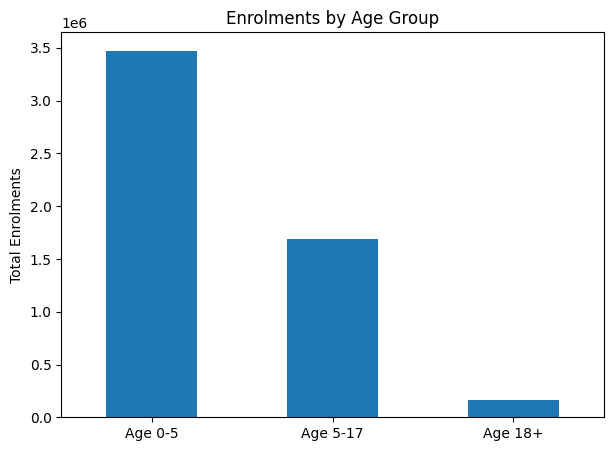

In [ ]:
plt.figure(figsize=(7,5))
age_summary.plot(kind='bar')
plt.title("Enrolments by Age Group")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=0)
plt.show()


In [ ]:
state_summary = data.groupby('State')['Total Enrolments'].sum().sort_values(ascending=False)

print(state_summary.head(10))


State
Uttar Pradesh     1002631
Bihar              593753
Madhya Pradesh     487892
West Bengal        369206
Maharashtra        363446
Rajasthan          340591
Gujarat            275042
Assam              225359
Karnataka          219618
Tamil Nadu         215710
Name: Total Enrolments, dtype: int64


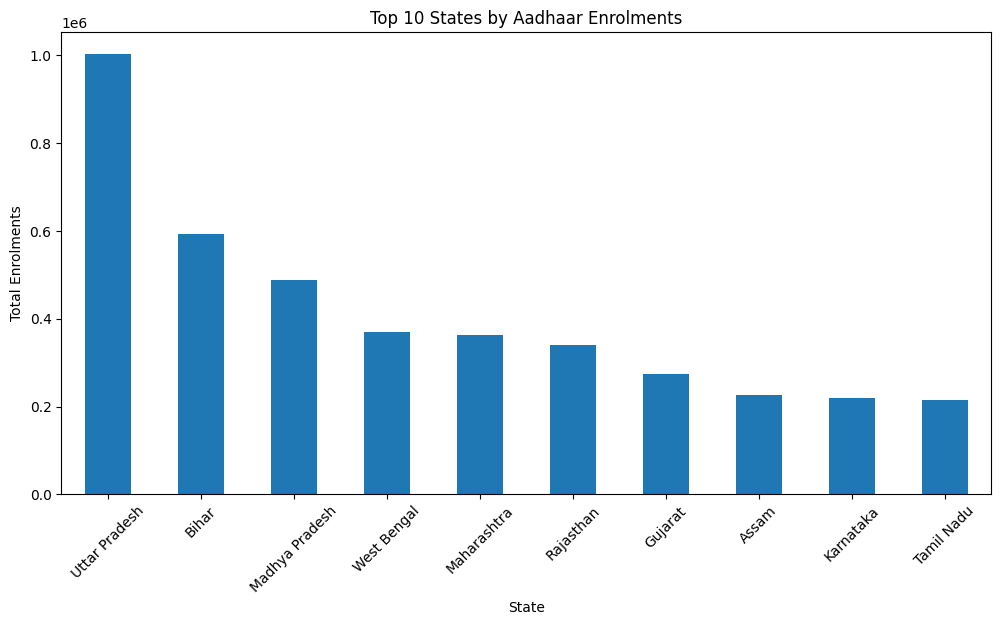

In [ ]:
plt.figure(figsize=(12,6))
state_summary.head(10).plot(kind='bar')
plt.title("Top 10 States by Aadhaar Enrolments")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=45)
plt.show()


In [ ]:
district_summary = data.groupby('District')['Total Enrolments'].sum().sort_values(ascending=False)

print(district_summary.head(10))


District
Thane                43142
Sitamarhi            41652
Bahraich             38897
Murshidabad          34968
South 24 Parganas    33088
Pune                 31148
Bengaluru            30657
Sitapur              30475
Jaipur               30341
Hyderabad            30268
Name: Total Enrolments, dtype: int64


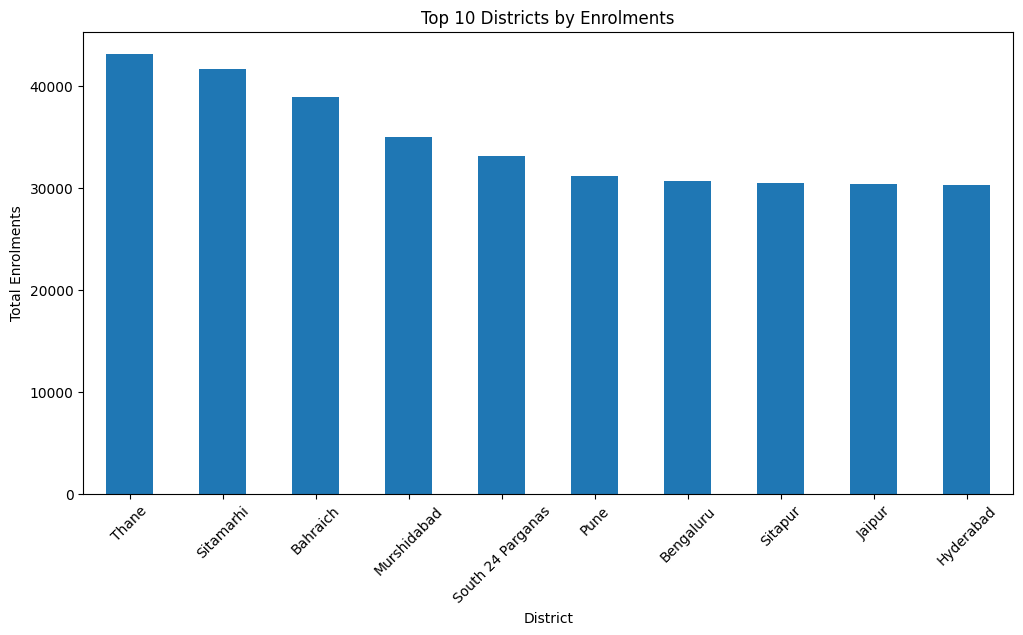

In [ ]:
plt.figure(figsize=(12,6))
district_summary.head(10).plot(kind='bar')
plt.title("Top 10 Districts by Enrolments")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=45)
plt.show()


In [ ]:
month_summary = data.groupby('Month')['Total Enrolments'].sum()

print(month_summary)


Month
3       16582
4      257438
5      183616
6      215734
7      616868
9     1475879
10     779617
11    1052584
12     733442
Name: Total Enrolments, dtype: int64


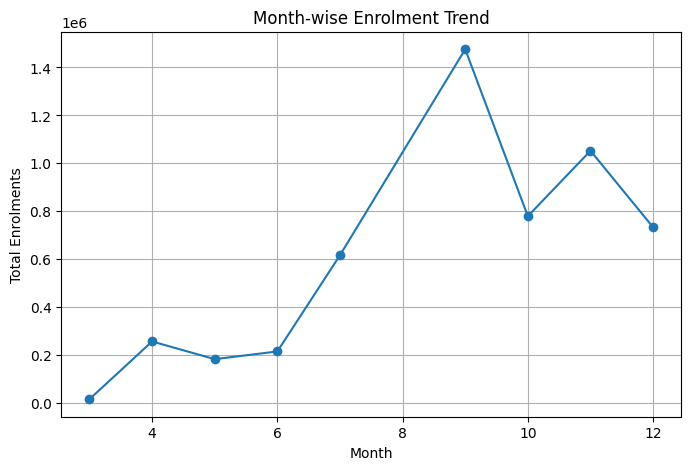

In [ ]:
plt.figure(figsize=(8,5))
month_summary.plot(kind='line', marker='o')
plt.title("Month-wise Enrolment Trend")
plt.ylabel("Total Enrolments")
plt.xlabel("Month")
plt.grid()
plt.show()


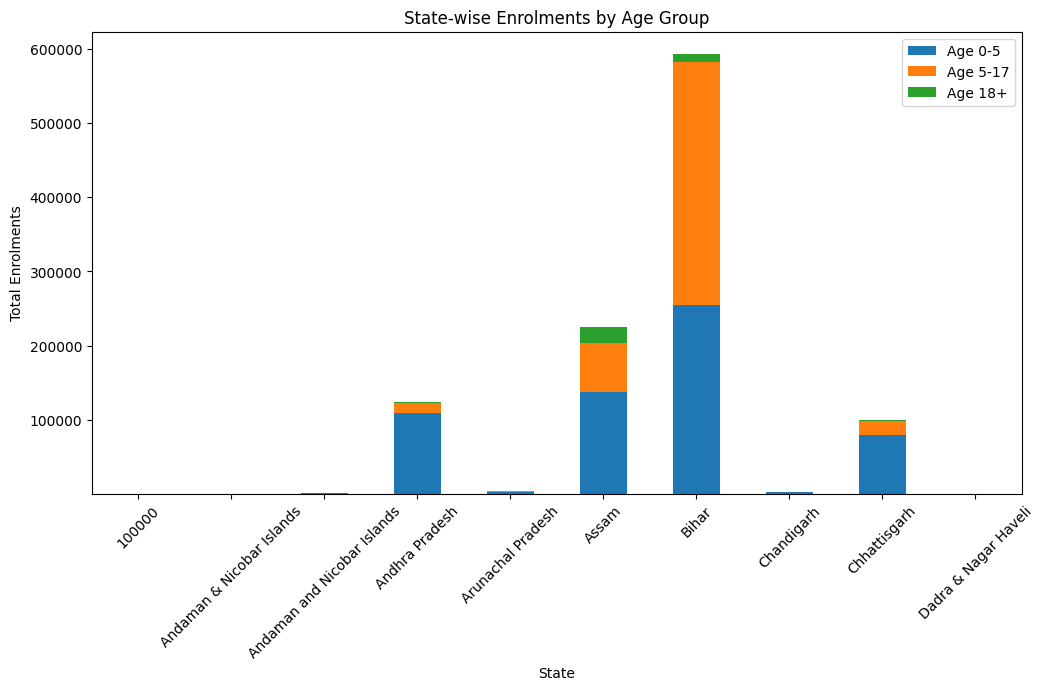

In [ ]:
state_age = data.groupby('State')[['Age 0-5', 'Age 5-17', 'Age 18+']].sum()

state_age.head(10).plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("State-wise Enrolments by Age Group")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=45)
plt.show()


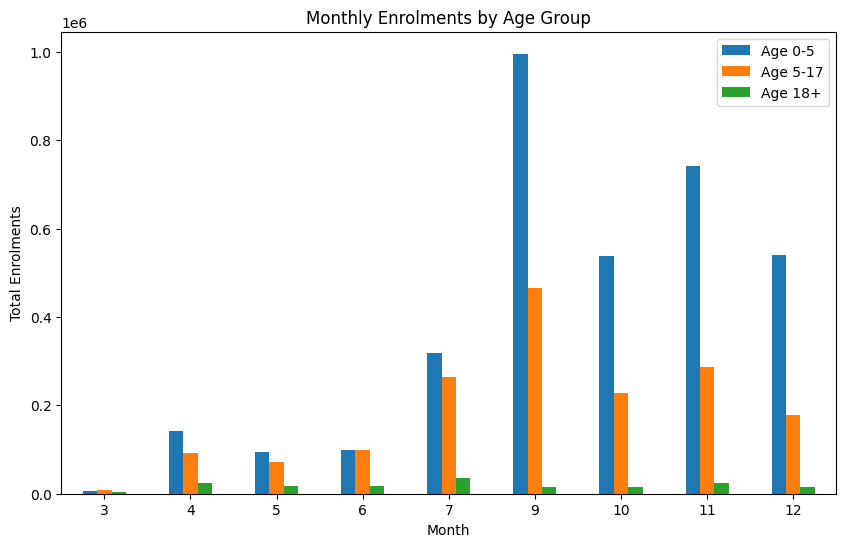

In [ ]:
month_age = data.groupby('Month')[['Age 0-5', 'Age 5-17', 'Age 18+']].sum()

month_age.plot(kind='bar', figsize=(10,6))
plt.title("Monthly Enrolments by Age Group")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=0)
plt.show()


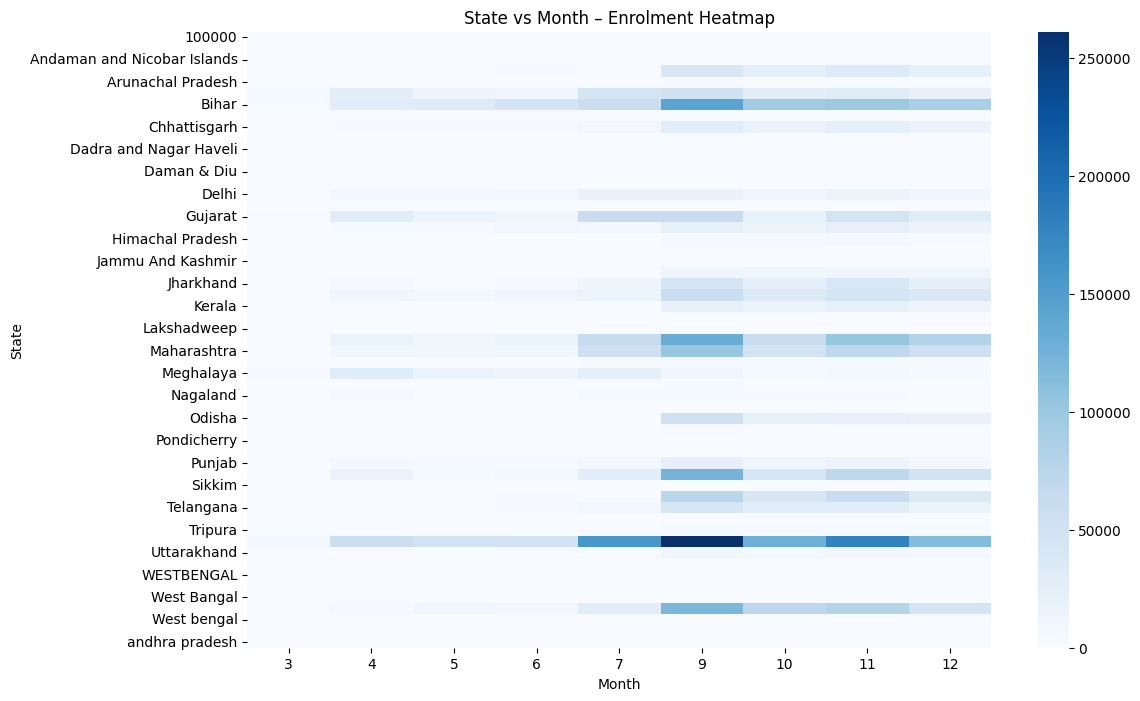

In [ ]:
state_month = data.pivot_table(
    values='Total Enrolments',
    index='State',
    columns='Month',
    aggfunc='sum'
)

plt.figure(figsize=(12,8))
sns.heatmap(state_month.fillna(0), cmap='Blues')
plt.title("State vs Month – Enrolment Heatmap")
plt.show()


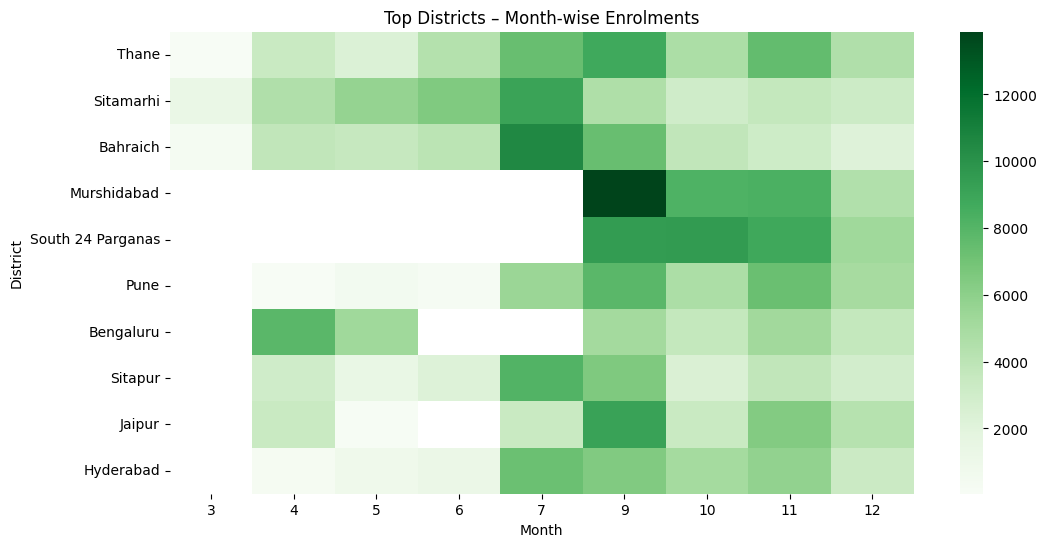

In [ ]:
top_districts = data.groupby('District')['Total Enrolments'].sum().nlargest(10).index

district_month = data.pivot_table(
    values='Total Enrolments',
    index='District',
    columns='Month',
    aggfunc='sum'
)

plt.figure(figsize=(12,6))
sns.heatmap(district_month.loc[top_districts], cmap='Greens')
plt.title("Top Districts – Month-wise Enrolments")
plt.show()


In [ ]:
data.to_csv("Clean_Aadhaar_Enrolment_Data.csv", index=False)
print("Clean dataset saved")


Clean dataset saved
